# Códigos e exemplos numéricos da disciplina de Análise Numérica - 2024/01
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Método de Euler

In [2]:
#solução numérica de y' = y - t^2 +1, y(0) = 1/2
def euler(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N

    y_numerico = []
    y_numerico.append(y0)
    for i in range(1,len(dominio)):
        y_novo = y0 + h*f(dominio[i-1], y0)
        y_numerico.append(y_novo)
        y0 = y_novo
    return y_numerico, dominio

y_real     = lambda t: (t+1)**2 - 0.5*np.exp(t)
f          = lambda t,y: y - t**2 + 1
y_num, dom = euler(0,2,10,f,0.5)
yti        = y_real(dom)
error      = abs(y_num - yti)

print(f'|---- ti ---|---- yi ---|---- y(ti) ----|---- y(ti) - yi ---')
for i in range(len(y_num)):
    print(f'|--- {round(dom[i],5)} ---|--- {round(y_num[i],5)} ---|--- {round(yti[i],5)} ----|--- {round(error[i],5)} ---')



|---- ti ---|---- yi ---|---- y(ti) ----|---- y(ti) - yi ---
|--- 0.0 ---|--- 0.5 ---|--- 0.5 ----|--- 0.0 ---
|--- 0.2 ---|--- 0.8 ---|--- 0.8293 ----|--- 0.0293 ---
|--- 0.4 ---|--- 1.152 ---|--- 1.21409 ----|--- 0.06209 ---
|--- 0.6 ---|--- 1.5504 ---|--- 1.64894 ----|--- 0.09854 ---
|--- 0.8 ---|--- 1.98848 ---|--- 2.12723 ----|--- 0.13875 ---
|--- 1.0 ---|--- 2.45818 ---|--- 2.64086 ----|--- 0.18268 ---
|--- 1.2 ---|--- 2.94981 ---|--- 3.17994 ----|--- 0.23013 ---
|--- 1.4 ---|--- 3.45177 ---|--- 3.7324 ----|--- 0.28063 ---
|--- 1.6 ---|--- 3.95013 ---|--- 4.28348 ----|--- 0.33336 ---
|--- 1.8 ---|--- 4.42815 ---|--- 4.81518 ----|--- 0.38702 ---
|--- 2.0 ---|--- 4.86578 ---|--- 5.30547 ----|--- 0.43969 ---


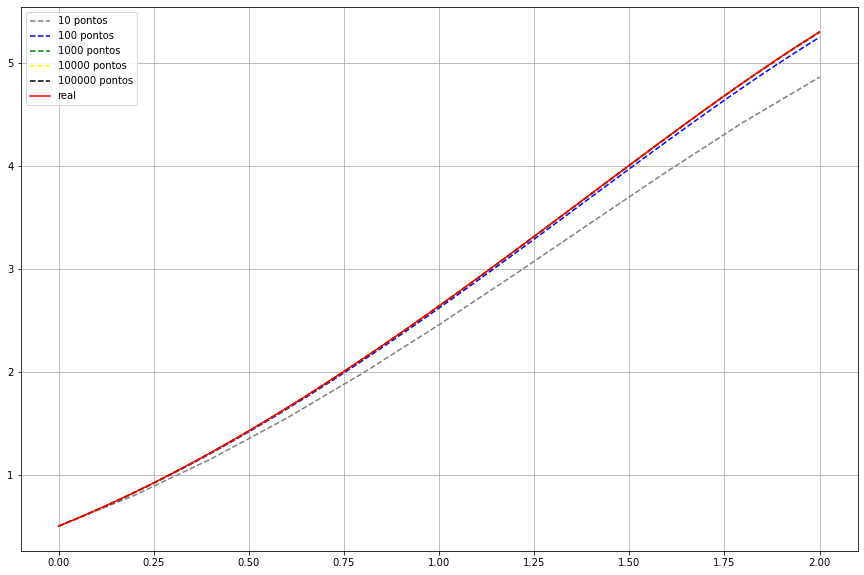

In [3]:
color_plot = ['gray','blue','green','yellow','black']
Ns         = [10,100,1000,10000,100000]
i          = 1

plt.figure(1,figsize = (15,10))
for n in Ns:
    y_num, dom = euler(0,2,n,f,0.5)
    yti        = y_real(dom)
    plt.plot(dom,y_num, '--', label=f'{n} pontos', color=color_plot[i-1])
    i += 1
plt.plot(dom,yti, 'r-', label = 'real')
plt.legend()
plt.grid()
plt.show()

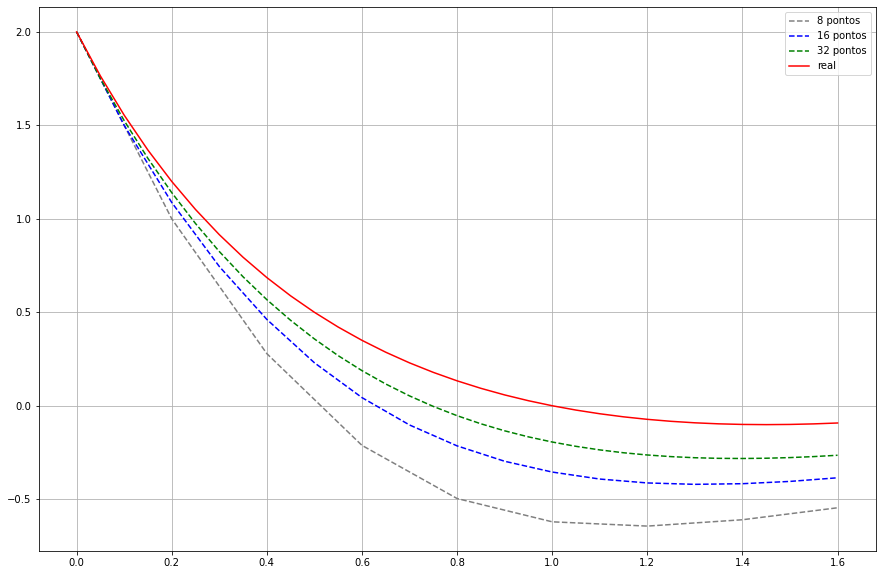

In [4]:
f = lambda x, y: y**2 - ((x**4 -6*x**3 +12*x**2 -14*x + 9 )/(1+x)**2)
y_real = lambda x: ((1 - x)*(2-x))/(1+x)
color_plot = ['gray','blue','green']
Ns         = [0.2,0.1,0.05]
i          = 1

plt.figure(1,figsize = (15,10))
for j in Ns:
    n = int((1.6)/j)
    y_num, dom = euler(0,1.6,n,f,2)
    yti        = y_real(dom)
    plt.plot(dom,y_num, '--', label=f'{n} pontos', color=color_plot[i-1])
    i += 1

plt.plot(dom,yti, 'r-', label = 'real')
plt.legend()
plt.grid()
plt.show()

## Métodos de Runge-Kutta

In [5]:
def euler_modificado(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N
    y_numerico = []
    y_numerico.append(y0)

    for i in range(1,len(dominio)):
        f_apli = f(dominio[i-1], y0)
        y_novo = y0 + (h/2)*(f_apli + f(dominio[i-1] + h, y0 + h*f_apli))
        y_numerico.append(y_novo)
        y0     = y_novo

    return y_numerico, dominio

In [9]:
#solução numérica de y' = y - t^2 +1, y(0) = 1/2 via Runge-Kutta de quarta ordem

def rk_FourthOrder(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N
    y_numerico = []
    y_numerico.append(y0)

    for i in range(1,len(dominio)):
        k1     = f(dominio[i-1], y0)
        k2     = f(dominio[i-1] + h/2, y0 + (h*k1)/2)
        k3     = f(dominio[i-1] + h/2, y0 + (h*k2)/2)
        k4     = f(dominio[i-1] + h, y0 + h*k3)
        y_novo = y0 + h/6*(k1 + 2*k2 + 2*k3 + k4)
        y_numerico.append(y_novo)
        y0     = y_novo

    return y_numerico, dominio

y_real     = lambda t: (t+1)**2 - 0.5*np.exp(t)
f          = lambda t,y: y - t**2 + 1
y_rk4, dom = rk_FourthOrder(0,2,10,f,0.5)
y_eum, dom = euler_modificado(0,2,10,f,0.5)
yti        = y_real(dom)
error_rk   = abs(y_rk4 - yti)
error_eum  = abs(y_eum - yti)

print(f'|---- ti ---|---- yi (RK 4 ordem) ---|---- yi (Euler mod) ---|---- y(ti) ----|---- erro - RK4 ---|---- erro - Euler mod ---')
for i in range(len(y_eum)):
    print(f'|--- {round(dom[i],5)} ---|-------- {round(y_rk4[i],5)} -------| -------- {round(y_eum[i],5)} ------- |-------- {round(yti[i],5)} -------|-------- {round(error_rk[i],5)} -------|-------- {round(error_eum[i],5)} ---------')


|---- ti ---|---- yi (RK 4 ordem) ---|---- yi (Euler mod) ---|---- y(ti) ----|---- erro - RK4 ---|---- erro - Euler mod ---
|--- 0.0 ---|-------- 0.5 -------| -------- 0.5 ------- |-------- 0.5 -------|-------- 0.0 -------|-------- 0.0 ---------
|--- 0.2 ---|-------- 0.82929 -------| -------- 0.826 ------- |-------- 0.8293 -------|-------- 1e-05 -------|-------- 0.0033 ---------
|--- 0.4 ---|-------- 1.21408 -------| -------- 1.20692 ------- |-------- 1.21409 -------|-------- 1e-05 -------|-------- 0.00717 ---------
|--- 0.6 ---|-------- 1.64892 -------| -------- 1.63724 ------- |-------- 1.64894 -------|-------- 2e-05 -------|-------- 0.0117 ---------
|--- 0.8 ---|-------- 2.1272 -------| -------- 2.11024 ------- |-------- 2.12723 -------|-------- 3e-05 -------|-------- 0.01699 ---------
|--- 1.0 ---|-------- 2.64082 -------| -------- 2.61769 ------- |-------- 2.64086 -------|-------- 4e-05 -------|-------- 0.02317 ---------
|--- 1.2 ---|-------- 3.17989 -------| -------- 3.14958 ----

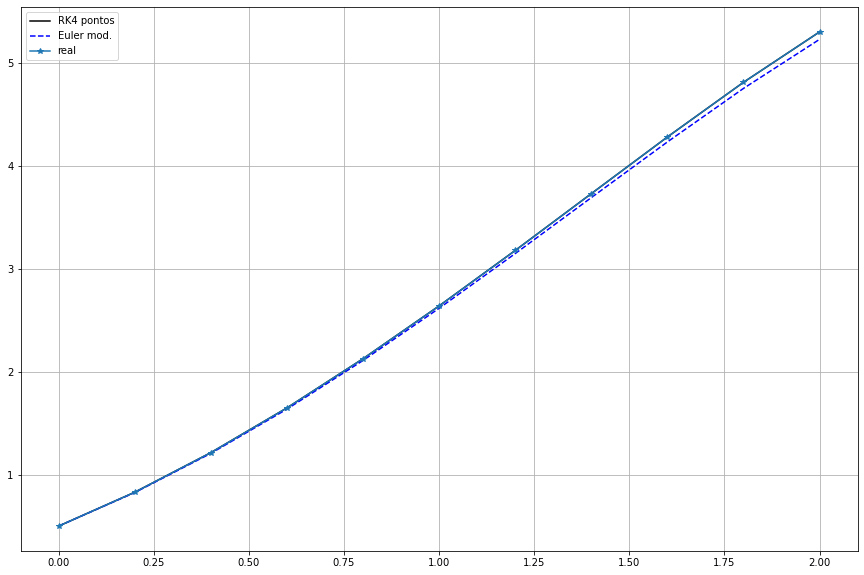

In [10]:
plt.figure(1,figsize = (15,10))
plt.plot(dom,y_rk4, '-', label='RK4 pontos', color='black')
plt.plot(dom,y_eum, '--', label='Euler mod.', color='blue')
plt.plot(dom,yti, '*-', label = 'real')
plt.legend()
plt.grid()
plt.show()

In [11]:
#comparações computacionais

y_real       = lambda t: (t+1)**2 - 0.5*np.exp(t)
f            = lambda t,y: y - t**2 + 1

h_euler      = 0.025
h_eumod      = 0.05
h_rk4        = 0.1

y_rk4, dom   = rk_FourthOrder(0,2,20,f,0.5)
y_eum, dom   = euler_modificado(0,2,40,f,0.5)
y_euler, dom = euler(0,2,80,f,0.5)
yti          = y_real(dom)

print(f'|---- ti ---|---------- Exato ---------|-------- yi (Euler) ------| ------ yi (Euler mod) -----|--- yi (RK 4 ordem) ----|')
print(f'|--- {round(dom[4],7)} ---|-------- {round(yti[4],7)} -------|-------- {round(y_euler[4],7)} -------| -------- {round(y_eum[2],7)} ------- |-------- {round(y_rk4[1],7)} -------|')
print(f'|--- {round(dom[8],7)} ---|-------- {round(yti[8],7)} -------|-------- {round(y_euler[8],7)} -------| -------- {round(y_eum[4],7)} ------- |-------- {round(y_rk4[2],7)} -------|')
print(f'|--- {round(dom[16],7)} ---|-------- {round(yti[16],7)} -------|-------- {round(y_euler[16],7)} -------| -------- {round(y_eum[8],7)} ------- |-------- {round(y_rk4[4],7)} -------|')
print(f'|--- {round(dom[32],7)} ---|-------- {round(yti[32],7)} -------|-------- {round(y_euler[32],7)} -------| -------- {round(y_eum[16],7)} ------- |-------- {round(y_rk4[8],7)} -------|')
print(f'|--- {round(dom[64],7)} ---|-------- {round(yti[64],7)} -------|-------- {round(y_euler[64],7)} -------| -------- {round(y_eum[32],7)} ------- |-------- {round(y_rk4[16],7)} -------|')


|---- ti ---|---------- Exato ---------|-------- yi (Euler) ------| ------ yi (Euler mod) -----|--- yi (RK 4 ordem) ----|
|--- 0.1 ---|-------- 0.6574145 -------|-------- 0.6554982 -------| -------- 0.6573085 ------- |-------- 0.6574144 -------|
|--- 0.2 ---|-------- 0.8292986 -------|-------- 0.8253385 -------| -------- 0.8290778 ------- |-------- 0.8292983 -------|
|--- 0.4 ---|-------- 1.2140877 -------|-------- 1.2056345 -------| -------- 1.2136079 ------- |-------- 1.2140869 -------|
|--- 0.8 ---|-------- 2.1272295 -------|-------- 2.1080276 -------| -------- 2.1260931 ------- |-------- 2.1272278 -------|
|--- 1.6 ---|-------- 4.2834838 -------|-------- 4.2353141 -------| -------- 4.2802567 ------- |-------- 4.283479 -------|


In [1]:
from scipy import linalg
import numpy as np

Jmod = np.array([[-1,-1,0,1,0],[-1,-1,0,1,0],[1,1,-1,0,0],[0,0,1,-1,0],[0,0,0,1,-1]])
linalg.eigvals(Jmod)

array([-1.00000000e+00+0.j, -2.00000000e+00+1.j, -2.00000000e+00-1.j,
        1.94064143e-16+0.j, -4.71173378e-18+0.j])

In [2]:
D, V = linalg.schur(Jmod)

In [3]:
D

array([[-1.00000000e+00, -2.76393202e-01,  7.23606798e-01,
         2.07648145e-01,  5.97396223e-01],
       [ 0.00000000e+00, -2.00000000e+00, -1.61803399e+00,
        -1.28676009e-16,  4.15369621e-16],
       [ 0.00000000e+00,  6.18033989e-01, -2.00000000e+00,
         6.76339147e-17, -1.55133333e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.94064143e-16, -2.37278625e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.71173378e-18]])

In [4]:
V

array([[ 0.        , -0.4472136 , -0.4472136 ,  0.77173336,  0.06654043],
       [ 0.        , -0.4472136 , -0.4472136 , -0.56408521,  0.5308558 ],
       [ 0.        ,  0.7236068 , -0.2763932 ,  0.20764815,  0.59739622],
       [ 0.        , -0.2763932 ,  0.7236068 ,  0.20764815,  0.59739622],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [5]:
Vinv = linalg.inv(V)
Vinv

array([[ 0.        ,  0.        ,  0.        , -0.        ,  1.        ],
       [-0.4472136 , -0.4472136 ,  0.7236068 , -0.2763932 ,  0.        ],
       [-0.4472136 , -0.4472136 , -0.2763932 ,  0.7236068 ,  0.        ],
       [ 0.77173336, -0.56408521,  0.20764815,  0.20764815,  0.        ],
       [ 0.06654043,  0.5308558 ,  0.59739622,  0.59739622,  0.        ]])

In [6]:
V.dot(Vinv)

array([[ 1.00000000e+00,  1.38777878e-17,  1.38777878e-17,
         1.38777878e-17,  0.00000000e+00],
       [-6.24500451e-17,  1.00000000e+00, -5.55111512e-17,
        -5.55111512e-17,  0.00000000e+00],
       [-2.77555756e-17,  5.55111512e-17,  1.00000000e+00,
         1.11022302e-16,  0.00000000e+00],
       [ 6.93889390e-18, -1.11022302e-16, -5.55111512e-17,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

In [7]:
import sympy as sp
#k1B, k1A, k2, k3, k4 = sp.symbols('k1B, k1A, k2, k3, k4')
A, B = sp.symbols('A, B')
k1 = 4e-6
k2 = 1
k3 = 5.79
k4 = 5e-4

J = sp.Matrix([[-k1*B,-k1*A,0,k3,0],[-k1*B,-k1*A,0,k3,0],[k1*B,k1*A,-k2,0,0],[0,0,k2,-k3,0],[0,0,0,k3,-k4]])
J

Matrix([
[-4.0e-6*B, -4.0e-6*A,  0,  5.79,       0],
[-4.0e-6*B, -4.0e-6*A,  0,  5.79,       0],
[ 4.0e-6*B,  4.0e-6*A, -1,     0,       0],
[        0,         0,  1, -5.79,       0],
[        0,         0,  0,  5.79, -0.0005]])

In [8]:
J.charpoly().as_expr()

-3.76158192263132e-37*A**3*B + 6.10038309884657e-32*A**2*B - 1.44443587189588e-25*A*B + 2.71050543121376e-20*B + 1.0*lambda**5 + lambda**4*(4.0e-6*A + 4.0e-6*B + 6.7905) + lambda**3*(2.7162e-5*A + 2.7162e-5*B + 5.793395) + lambda**2*(1.35799999999979e-8*A + 1.35799999999979e-8*B + 0.002895) + lambda*(-4.93038065763132e-32*A**2*B + 3.06884007257173e-21*A)

In [9]:
Jac_eigenvalues = J.eigenvals()
Jac_eigenvalues

{-1.33333333333333e-6*A - 1.33333333333333e-6*B - 0.0490918016691213*(-8.148e-5*A - 8.148e-5*B + 46.1041*(5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)**2 - 17.37)/(-5.57371577422011e-28*A*B + sqrt(1.0*(-5.57371577422011e-28*A*B + (5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)**3 - 0.00159720507511657*(2.716e-5*A + 2.716e-5*B + 5.79)*(3.6e-5*A + 3.6e-5*B + 61.11))**2 - (-1.76730486008836e-6*A - 1.76730486008836e-6*B + (5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)**2 - 0.376756080261842)**3) + 1.0*(5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)**3 - 0.00159720507511657*(2.716e-5*A + 2.716e-5*B + 5.79)*(3.6e-5*A + 3.6e-5*B + 61.11))**(1/3) - 2.26333333333333*(-5.57371577422011e-28*A*B + sqrt(1.0*(-5.57371577422011e-28*A*B + (5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)**3 - 0.00159720507511657*(2.716e-5*A + 2.716e-5*B + 5.79)*(3.6e-5*A + 3.6e-5*B + 61.11))**2 - (-1.76730486008836e-6*A - 1.76730486008836e-6*B + (5.89101620029455e-7*A + 5.89101620029455e-7*B + 1)*

In [10]:
#(eigenval, multiplicity, eigenspace)
Jac_eigenvectors = J.eigenvects()
Jac_eigenvectors

[(-0.000500000000000000,
  1,
  [Matrix([
   [  0],
   [  0],
   [  0],
   [  0],
   [1.0]])]),
 (0,
  2,
  [Matrix([
   [-A/B],
   [ 1.0],
   [   0],
   [   0],
   [   0]]),
   Matrix([
   [            125.0/B],
   [                  0],
   [             0.0005],
   [8.63557858376511e-5],
   [                1.0]])]),
 (-2.0e-6*A - 2.0e-6*B - 2.395*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 - 3.395,
  1,
  [Matrix([
   [4.69084628670121e-6*A + 4.69084628670121e-6*B + (6.90846286701209e-7*A + 6.90846286701209e-7*B - 8.63557858376511e-5)*(-2.0e-6*A - 2.0e-6*B - 2.395*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 - 3.395) + 0.999413644214162],
   [4.69084628670121e-6*A + 4.69084628670121e-6*B + (6.90846286701209e-7*A + 6.90846286701209e-7*B - 8.63557858376511e-5)*(-2.0e-6*A - 2.0e-6*B - 2.395*(6.9734

In [11]:
eigenvalues_list = []
for j, eig in enumerate(Jac_eigenvalues.keys()):
    if j == 0 or j == 1:
        eigenvalues_list.append(eig)
eigenvalues_list.append(0)
eigenvalues_list.append(0)
eigenvalues_list.append(-k4)
D = sp.Matrix.diag(eigenvalues_list)

In [12]:
V, Lambda = J.diagonalize()

In [13]:
Lambda

Matrix([
[-0.0005, 0, 0,                                                                                                                                                                                0,                                                                                                                                                                                0],
[      0, 0, 0,                                                                                                                                                                                0,                                                                                                                                                                                0],
[      0, 0, 0,                                                                                                                                                                                0,                                                    

In [14]:
V

Matrix([
[  0, -A/B,             125.0/B, 4.69084628670121e-6*A + 4.69084628670121e-6*B - 1.38169257340242e-12*(A + B - 125.0)*(A + B + 1197500.0*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 + 1697500.0) + 0.999413644214162, 4.69084628670121e-6*A + 4.69084628670121e-6*B - 1.38169257340242e-12*(A + B - 125.0)*(A + B - 1197500.0*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 + 1697500.0) + 0.999413644214162],
[  0,  1.0,                   0, 4.69084628670121e-6*A + 4.69084628670121e-6*B - 1.38169257340242e-12*(A + B - 125.0)*(A + B + 1197500.0*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 + 1697500.0) + 0.999413644214162, 4.69084628670121e-6*A + 4.69084628670121e-6*B - 1.38169257340242e-12*(A + B - 125.0)*(A + 

In [15]:
V.inv()

Matrix([
[(-1.31278413564209e-50*A**4*B*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 - 5.85025902184529e-50*A**3*B**2*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 + 1.15758002512753e-28*A**3*B*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 - 1.5720590024314e-44*A**3*B*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**1.0 - 9.07494977240641e-50*A**2*B**3*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B**2 - 2.36749316817831e-6*B + 1)**0.5 + 3.47274007538259e-28*A**2*B**2*(6.97347030391255e-13*A**2 + 1.39469406078251e-12*A*B - 2.36749316817831e-6*A + 6.97347030391255e-13*B